In [1]:
# Import necessary libraries
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np 

# Setup for inline plotting
%matplotlib inline

In [2]:
# Define audio paths
techno_file = '../data/raw/techno/Jayron - FIYA! (EXTENDED MIX).wav'
house_file = '../data/raw/house/Kiss It Better.mp3'
dubstep_file = '../data/raw/dubstep/Subtronics x Wooli - Hallelujah.mp3'

In [3]:
# Narrow focus for audio loading

# Techno
t, sr_t = librosa.load(techno_file, offset=55, duration=20)

print(f"Loaded 30 seconds of {techno_file}")
print(f"Sample Rate: {sr_t}")
print(f"Total Samples: {len(t)}")

Loaded 30 seconds of ../data/raw/techno/Jayron - FIYA! (EXTENDED MIX).wav
Sample Rate: 22050
Total Samples: 441000


In [4]:
# House
h, sr_h = librosa.load(house_file, offset=60, duration=20)

print(f"Loaded 30 seconds of {house_file}")
print(f"Sample Rate: {sr_h}")
print(f"Total Samples: {len(h)}")

Loaded 30 seconds of ../data/raw/house/Kiss It Better.mp3
Sample Rate: 22050
Total Samples: 441000


In [5]:
# Dubstep
d, sr_d = librosa.load(dubstep_file, offset=60, duration=20)

print(f"Loaded 30 seconds of {dubstep_file}")
print(f"Sample Rate: {sr_d}")
print(f"Total Samples: {len(d)}")

Loaded 30 seconds of ../data/raw/dubstep/Subtronics x Wooli - Hallelujah.mp3
Sample Rate: 22050
Total Samples: 441000


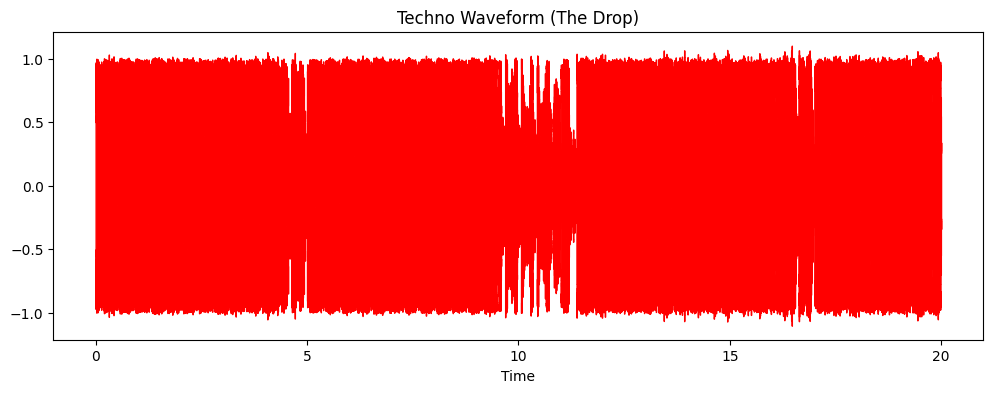

In [6]:
# Visualize the waveform - Techno
plt.figure(figsize=(12, 4))
librosa.display.waveshow(t, sr=sr_t, color='red')
plt.title("Techno Waveform (The Drop)")
plt.show()

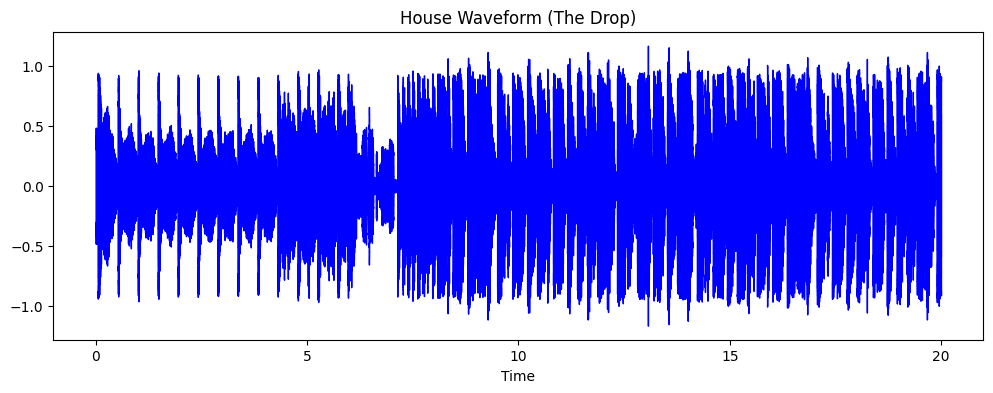

In [7]:
# Visualize the waveform - House
plt.figure(figsize=(12, 4))
librosa.display.waveshow(h, sr=sr_h, color='blue')
plt.title("House Waveform (The Drop)")
plt.show()

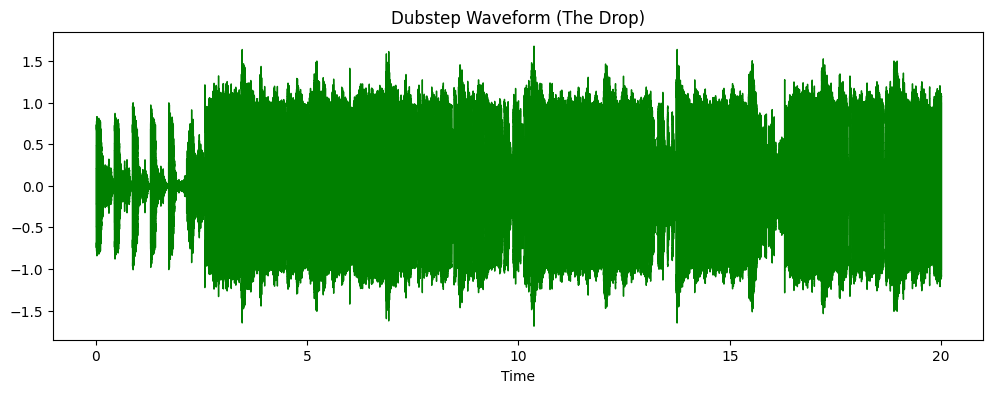

In [8]:
# Visualize the waveform - Dubstep
plt.figure(figsize=(12, 4))
librosa.display.waveshow(d, sr=sr_d, color='green')
plt.title("Dubstep Waveform (The Drop)")
plt.show()

In [9]:
# Extract BPM
# Calculate Strength of the Onsets (Beats) - Techno
onset_env = librosa.onset.onset_strength(y=t, sr=sr_t)
tempo, _ = librosa.beat.beat_track(onset_envelope=onset_env, sr=sr_t)

print(f"Estimated Tempo: {tempo.item():.2f} BPM")

Estimated Tempo: 161.50 BPM


In [10]:
# Calculate Strength of the Onsets (Beats) - House
onset_env = librosa.onset.onset_strength(y=h, sr=sr_h)
tempo, _ = librosa.beat.beat_track(onset_envelope=onset_env, sr=sr_h)

print(f"Estimated Tempo: {tempo.item():.2f} BPM")

Estimated Tempo: 129.20 BPM


In [11]:
# Calculate Strength of the Onsets (Beats) - Dubstep
onset_env = librosa.onset.onset_strength(y=d, sr=sr_d)
tempo, _ = librosa.beat.beat_track(onset_envelope=onset_env, sr=sr_d)

print(f"Estimated Tempo: {tempo.item():.2f} BPM")

Estimated Tempo: 143.55 BPM


In [12]:
genres = {'Techno': techno_file, 'House': house_file, 'Dubstep': dubstep_file}

for name, path in genres.items():
    audio, rate = librosa.load(path, offset=60, duration=20)
    t_a, _ = librosa.beat.beat_track(y=audio, sr=rate)
    print(f"{name} Tempo: {t_a.item():.2f} BPM")

Techno Tempo: 161.50 BPM
House Tempo: 129.20 BPM
Dubstep Tempo: 143.55 BPM


In [13]:
# Calculate Spectral Centroid - Techno
spectral_centroids = librosa.feature.spectral_centroid(y=t, sr=sr_t)[0]

# Calculate the mean so we have one single number for the track
mean_spectral_centroid = np.mean(spectral_centroids)
print(f"Mean Spectral Centroid: {mean_spectral_centroid:.2f}")

Mean Spectral Centroid: 2543.82


MFCC Feature Row (13 values):
[47.896145  78.86438   14.8422165 20.456284   3.7599463 13.008823
 10.7397585 14.087993   4.980773   7.85024   -1.3506658  3.9335434
  2.413354 ]
MFCC Standard Deviations (The 'Swing'):
[33.954525  21.892868  17.007113   8.937009   8.108436   6.4858623
  7.9373097  8.54822    8.101622   6.230784   4.7926745  6.922035
  7.796603 ]


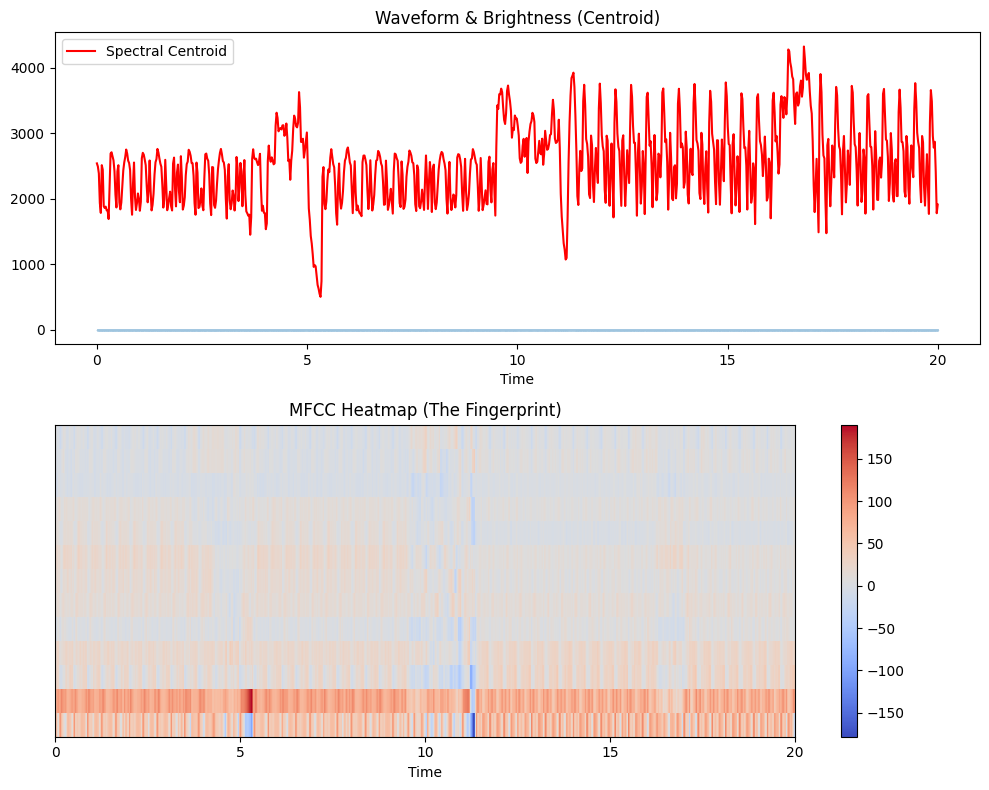

In [14]:
# Extract 12 MFCCs - Techno
mfccs = librosa.feature.mfcc(y=t, sr=sr_t, n_mfcc=13)

# Take the average of each coefficient across time
# Result: A list of 13 numbers representing the song's DNA
mfccs_mean = np.mean(mfccs, axis=1)

print("MFCC Feature Row (13 values):")
print(mfccs_mean)

# Calculate the 'Swing' (Standard Deviation)
mfccs_std = np.std(mfccs, axis=1)

print("MFCC Standard Deviations (The 'Swing'):")
print(mfccs_std)

plt.figure(figsize=(10, 8))

# Subplot 1: Waveform + Centroid
plt.subplot(2, 1, 1)
frames = range(len(spectral_centroids))
ta = librosa.frames_to_time(frames)
librosa.display.waveshow(t, sr=sr_t, alpha=0.4)
plt.plot(ta, spectral_centroids, color='r', label='Spectral Centroid')
plt.title("Waveform & Brightness (Centroid)")
plt.legend()

# Subplot 2: MFCC Heatmap
plt.subplot(2, 1, 2)
librosa.display.specshow(mfccs, x_axis='time', sr=sr_t)
plt.colorbar()
plt.title('MFCC Heatmap (The Fingerprint)')

plt.tight_layout()
plt.show()

In [15]:
# Calculate Spectral Centroid - House
spectral_centroids = librosa.feature.spectral_centroid(y=h, sr=sr_h)[0]

# Calculate the mean so we have one single number for the track
mean_spectral_centroid = np.mean(spectral_centroids)
print(f"Mean Spectral Centroid: {mean_spectral_centroid:.2f}")

Mean Spectral Centroid: 2873.38


MFCC Feature Row (13 values):
[-49.03618     65.467865     5.5905347   26.538263    11.64124
  15.844623    10.46734      7.8165355   11.870182    16.380579
   0.41718942   4.664502    -5.1562777 ]
MFCC Standard Deviations (The 'Swing'):
[66.870094  50.931953  24.699707  16.869385  10.611352  12.261052
 11.63424   11.408913  11.931932   9.4819975  7.2897506  7.1380663
  7.2790484]


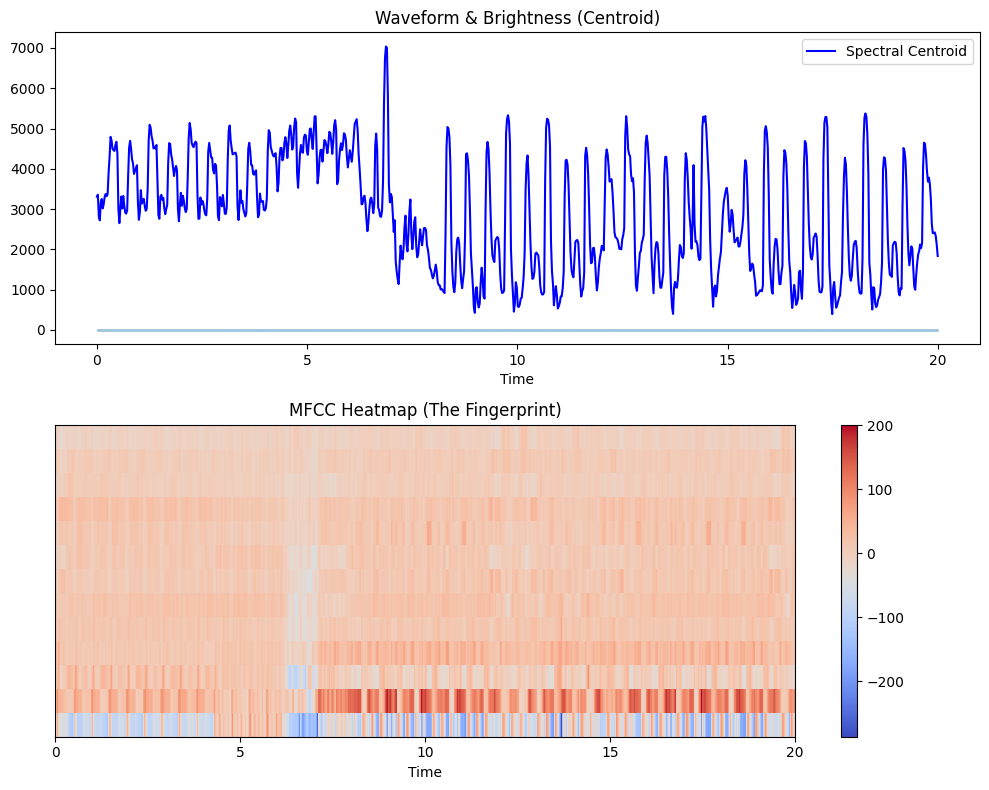

In [16]:
# Extract 12 MFCCs - House
mfccs = librosa.feature.mfcc(y=h, sr=sr_h, n_mfcc=13)

# Take the average of each coefficient across time
# Result: A list of 13 numbers representing the song's DNA
mfccs_mean = np.mean(mfccs, axis=1)

print("MFCC Feature Row (13 values):")
print(mfccs_mean)

# Calculate the 'Swing' (Standard Deviation)
mfccs_std = np.std(mfccs, axis=1)

print("MFCC Standard Deviations (The 'Swing'):")
print(mfccs_std)

plt.figure(figsize=(10, 8))

# Subplot 1: Waveform + Centroid
plt.subplot(2, 1, 1)
frames = range(len(spectral_centroids))
ta = librosa.frames_to_time(frames)
librosa.display.waveshow(h, sr=sr_h, alpha=0.4)
plt.plot(ta, spectral_centroids, color='b', label='Spectral Centroid')
plt.title("Waveform & Brightness (Centroid)")
plt.legend()

# Subplot 2: MFCC Heatmap
plt.subplot(2, 1, 2)
librosa.display.specshow(mfccs, x_axis='time', sr=sr_t)
plt.colorbar()
plt.title('MFCC Heatmap (The Fingerprint)')

plt.tight_layout()
plt.show()

In [17]:
# Calculate Spectral Centroid - Dubstep
spectral_centroids = librosa.feature.spectral_centroid(y=d, sr=sr_d)[0]

# Calculate the mean so we have one single number for the track
mean_spectral_centroid = np.mean(spectral_centroids)
print(f"Mean Spectral Centroid: {mean_spectral_centroid:.2f}")

Mean Spectral Centroid: 3306.81


MFCC Feature Row (13 values):
[ 52.507164   37.577744  -14.866255   11.991259    0.4817417  11.9253025
   7.115785   12.866213    1.1087954   6.668226    8.08179    20.631792
  10.707412 ]
MFCC Standard Deviations (The 'Swing'):
[82.30293   25.9372    26.813889  14.264543  15.448172  15.071036
 16.87707   15.240838  13.266117  10.86569    9.944158  12.3883505
 10.7926655]


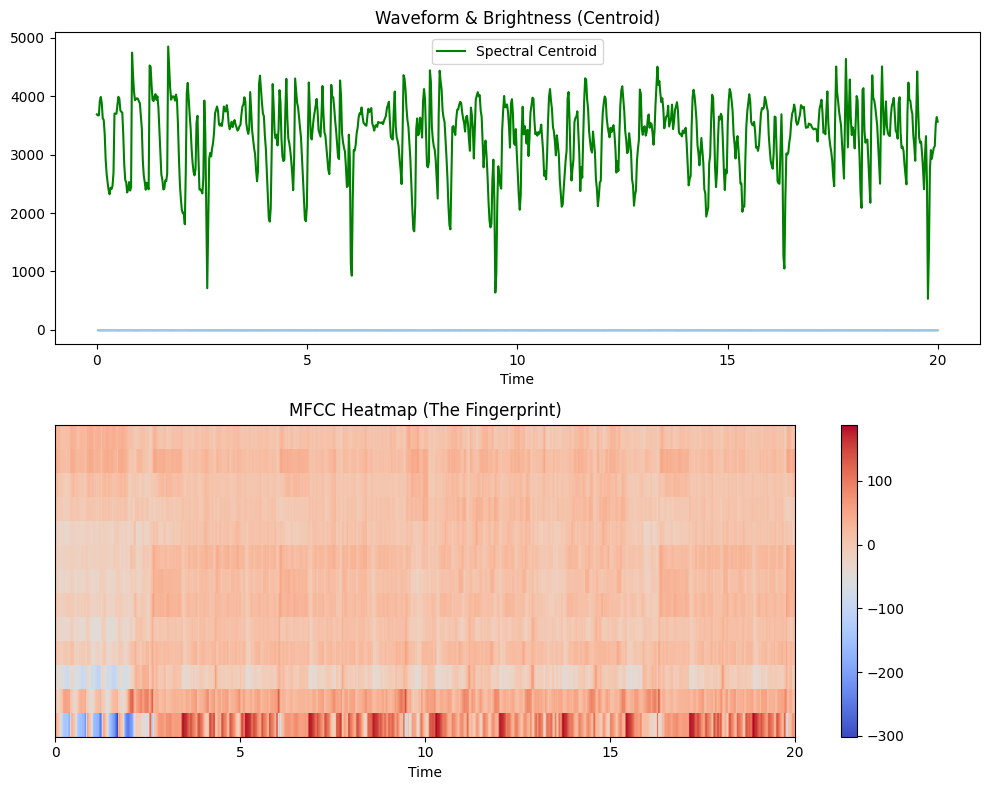

In [18]:
# Extract 12 MFCCs - Dubstep
mfccs = librosa.feature.mfcc(y=d, sr=sr_d, n_mfcc=13)

# Take the average of each coefficient across time
# Result: A list of 13 numbers representing the song's DNA
mfccs_mean = np.mean(mfccs, axis=1)

print("MFCC Feature Row (13 values):")
print(mfccs_mean)

# Calculate the 'Swing' (Standard Deviation)
mfccs_std = np.std(mfccs, axis=1)

print("MFCC Standard Deviations (The 'Swing'):")
print(mfccs_std)

plt.figure(figsize=(10, 8))

# Subplot 1: Waveform + Centroid
plt.subplot(2, 1, 1)
frames = range(len(spectral_centroids))
ta = librosa.frames_to_time(frames)
librosa.display.waveshow(d, sr=sr_d, alpha=0.4)
plt.plot(ta, spectral_centroids, color='g', label='Spectral Centroid')
plt.title("Waveform & Brightness (Centroid)")
plt.legend()

# Subplot 2: MFCC Heatmap
plt.subplot(2, 1, 2)
librosa.display.specshow(mfccs, x_axis='time', sr=sr_t)
plt.colorbar()
plt.title('MFCC Heatmap (The Fingerprint)')

plt.tight_layout()
plt.show()